# <font color='#71B1D9'> House Rent Price Prediction  

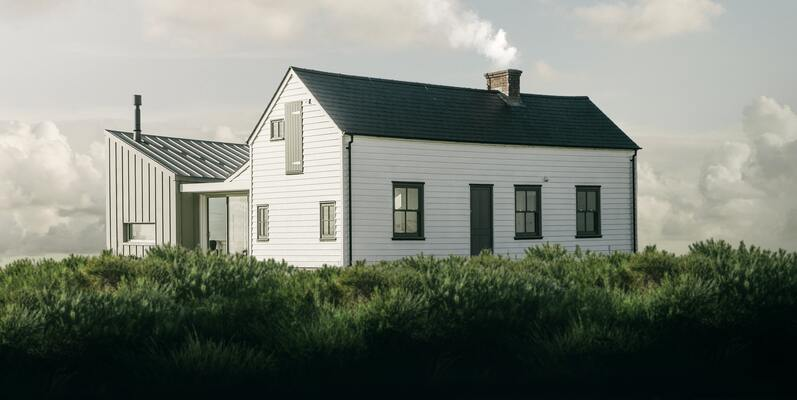

## <font color='#71B1D9'> Aim

The goal of this project is to predict rent prices for residential properties in India based on various factors such as the number of bedrooms, size, locality, and other key features. By leveraging machine learning techniques, we aim to develop a model that accurately estimates the rent prices of houses, apartments, and flats, helping both potential tenants and property owners make informed decisions.

## <font color='#71B1D9'>Dataset Description

This dataset contains information about over 4700 residential properties available for rent in India. The dataset includes various attributes such as:

- **BHK (Bedrooms, Hall, Kitchen)**: The number of bedrooms, hall, and kitchen in the property.
- **Rent**: The rent price of the property.
- **Size**: The size of the property in square feet.
- **Floor**: The floor on which the property is located, along with the total number of floors in the building (e.g., 'Ground out of 2', '3 out of 5').
- **Area Type**: The type of area used for property size calculation (e.g., Super Area, Carpet Area, or Built Area).
- **Area Locality**: The locality in which the property is located.
- **City**: The city where the property is located.
- **Furnishing Status**: The furnishing status of the property (e.g., Furnished, Semi-Furnished, or Unfurnished).
- **Tenant Preferred**: The type of tenant preferred by the property owner or agent.
- **Bathroom**: The number of bathrooms in the property.
- **Point of Contact**: Contact information for the point of contact regarding the property.

This comprehensive dataset provides crucial insights into the real estate rental market in India and will be used to train predictive models that estimate the rent prices based on the aforementioned features.

## <font color='#71B1D9'> Requirements

In [1031]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',None)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import normalize, scale

## <font color='#71B1D9'> Import Data

In [812]:
df=pd.read_csv('House_Rent_Dataset.csv')

## <font color='#71B1D9'> EDA (Exploratory Data Analysis)

In [814]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [815]:
df.shape

(4746, 12)

In [816]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [817]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BHK,4746.0,2.083860,0.832256,1.0,2.0,2.0,3.0,6.0
Rent,4746.0,34993.451327,78106.412937,1200.0,10000.0,16000.0,33000.0,3500000.0
Size,4746.0,967.490729,634.202328,10.0,550.0,850.0,1200.0,8000.0
Bathroom,4746.0,1.965866,0.884532,1.0,1.0,2.0,2.0,10.0


In [818]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [819]:
df['BHK'].unique()

array([2, 1, 3, 6, 4, 5], dtype=int64)

In [820]:
df['Area Type'].unique()

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

In [821]:
df['City'].unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

In [822]:
df['Furnishing Status'].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [823]:
df['Tenant Preferred'].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

In [824]:
df['Point of Contact'].unique()

array(['Contact Owner', 'Contact Agent', 'Contact Builder'], dtype=object)

In [825]:
df['Area Locality'].nunique()

2235

## <font color='#71B1D9'> Data Visualization

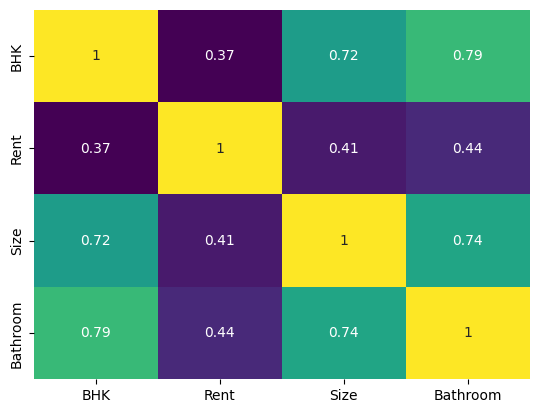

In [827]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='viridis',cbar=None);

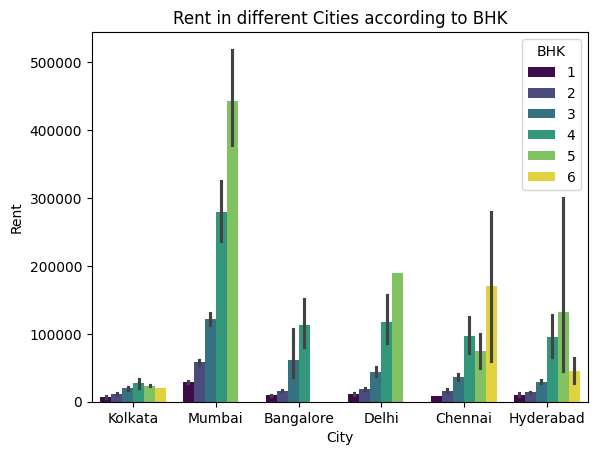

In [828]:
sns.barplot(x=df['City'],y=df['Rent'],hue=df['BHK'],palette='viridis')
plt.title('Rent in different Cities according to BHK');

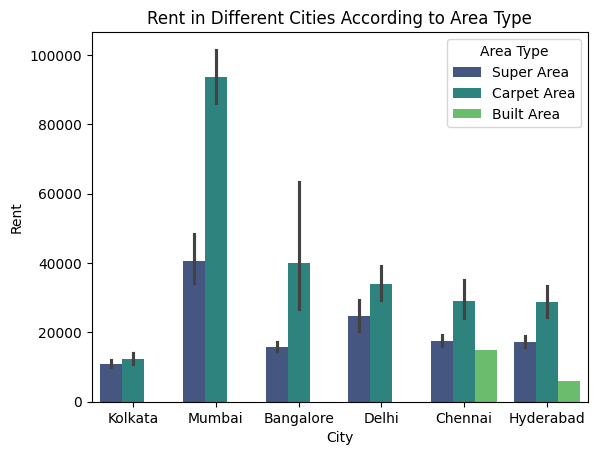

In [829]:
sns.barplot(x=df['City'],y=df['Rent'],hue=df['Area Type'],palette='viridis')
plt.title('Rent in Different Cities According to Area Type');

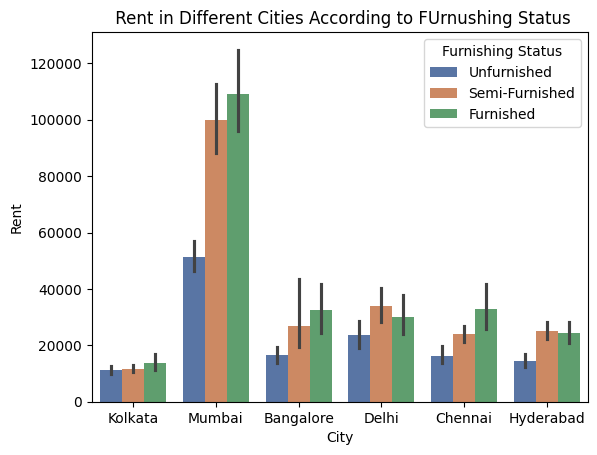

In [830]:
sns.barplot(x=df['City'],y=df['Rent'],hue=df['Furnishing Status'],palette='deep')
plt.title(' Rent in Different Cities According to FUrnushing Status');

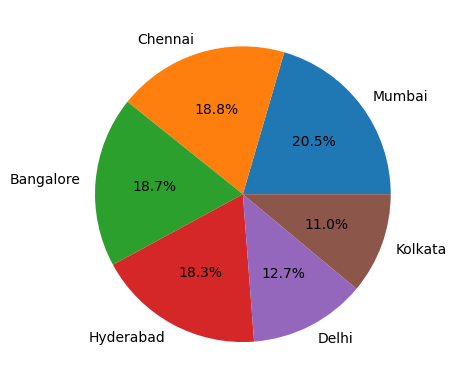

In [831]:
plt.pie(
    x=df['City'].value_counts(),  
    labels=df['City'].value_counts().index,  
    autopct='%1.1f%%'
);

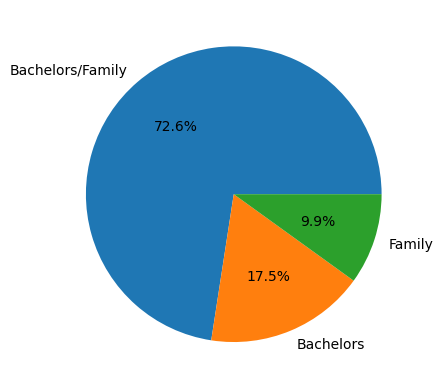

In [832]:
plt.pie(
    x=df['Tenant Preferred'].value_counts(),
    labels=df['Tenant Preferred'].value_counts().index,
    autopct='%1.1f%%'
);

<Axes: xlabel='Rent'>

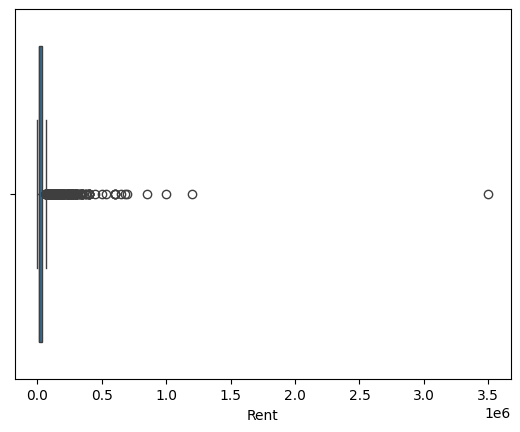

In [833]:
sns.boxplot(x=df['Rent'])

<Axes: xlabel='Bathroom'>

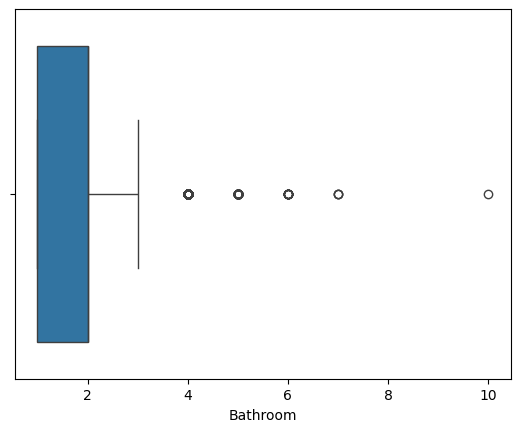

In [834]:
sns.boxplot(x=df['Bathroom'])

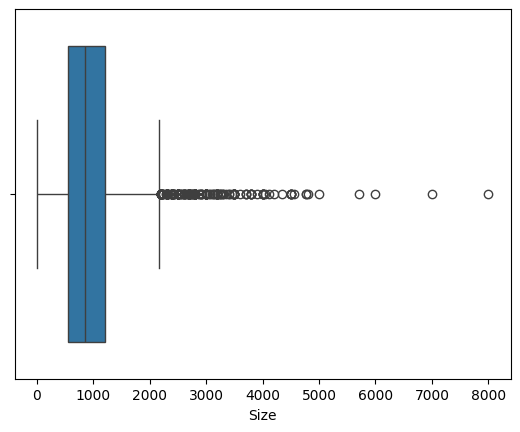

In [835]:
sns.boxplot(x=df['Size']);

## <font color='#71B1D9'> Feature Engineering

In [837]:
df['Extracted Floor'] = df['Floor'].str.extract(r'^(\d{1,2}|[A-Za-z]+)', expand=False)

In [838]:
def map_floors(floor):
    if floor.startswith('Ground'):
        return 0
    elif floor.startswith('Upper'):
        return 0
    elif floor.startswith('Lower'):
        return -1
    else:
        return floor

In [839]:
df['Extracted Floor'] = df['Extracted Floor'].apply(map_floors)

In [840]:
df['Extracted Floor'].unique()

array([0, '1', '2', '4', '3', '5', '7', '8', '11', -1, '6', '14', '43',
       '13', '18', '17', '9', '19', '60', '34', '12', '26', '25', '53',
       '16', '10', '39', '32', '47', '28', '20', '15', '65', '40', '37',
       '22', '21', '30', '35', '33', '44', '41', '46', '27', '45', '48',
       '50', '24', '23', '29', '49', '36', '76'], dtype=object)

In [841]:
df['Extracted Floor']=df['Extracted Floor'].astype(int)

In [842]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Extracted Floor
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1


In [898]:
outliers=df.quantile(q=.97,numeric_only=True)
df=df[(df['Rent']<outliers['Rent'])]
df=df[(df['Bathroom']<outliers['Bathroom'])]
df=df[(df['Size']<outliers['Size'])]

## <font color='#71B1D9'> Modelling Conversational Methods

In [1310]:
x=df.drop(columns=['Posted On','Rent','Floor'],axis=1)
y=df[['Rent']]

In [1314]:
x.columns

Index(['BHK', 'Size', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Bathroom', 'Point of Contact',
       'Extracted Floor'],
      dtype='object')

In [1281]:
x=pd.get_dummies(x,drop_first=True)

In [1283]:
def regression_algo(x,y,plot=False):
    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    kn=KNeighborsRegressor()
    dt=DecisionTreeRegressor()
    xgb=XGBRegressor()
    rf=RandomForestRegressor()

    algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb,rf]
    algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Bossting','KNeighborRegressor','DecisionTreeRegressor','XGBReggressor','Random Forest Classifier']

    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

    r_squared=[]
    rmse=[]
    mae=[]

    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)

    for algo in algos:
        p=algo.fit(x_train,y_train).predict(x_test)
        r_squared.append(r2_score(y_test,p))
        rmse.append(mean_squared_error(y_test,p)**0.5)
        mae.append(mean_absolute_error(y_test,p))

    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae

    r_table=result.sort_values('R_Squared',ascending=False)
    if plot:
        best_model = algos[r_squared.index(max(r_squared))]
        y_pred = best_model.predict(x_test)
        
        plt.figure(figsize=(10,6))
        plt.plot(y_test.reset_index(drop=True),label='Acutal Rent',color='green',linestyle='--')
        plt.plot(pd.Series(y_pred),label='Predicted Rent',color='red',linestyle='--')
        plt.xlabel('Predicted Rent')
        plt.ylabel('Actual Rent')
        plt.title('Actual vs Predicted Rent for Best Model')
        plt.legend()
        plt.show()
    return r_table

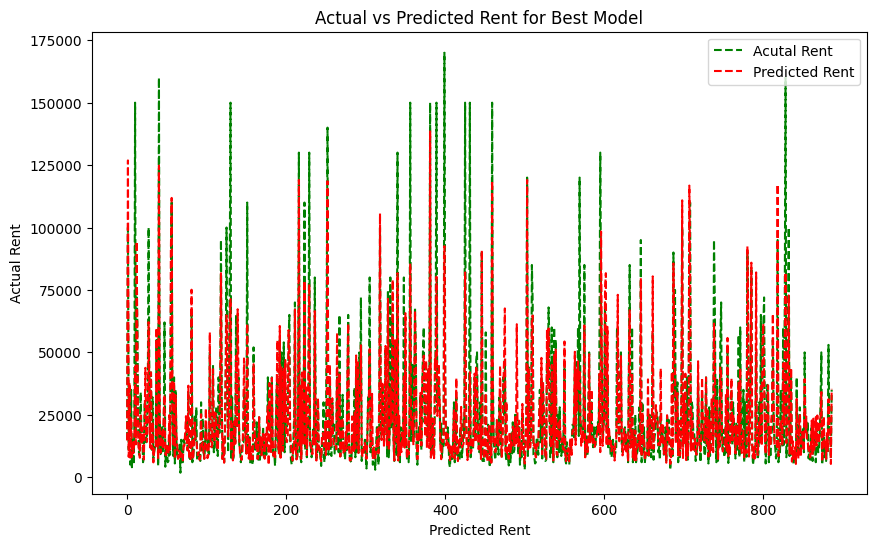

,R_Squared,RMSE,MAE
XGBReggressor,0.745385,13165.399952,6696.444193
Random Forest Classifier,0.719723,13812.913457,6634.959634
Gradient Bossting,0.707885,14101.616329,7144.463642
Ridge,0.666297,15072.037982,8223.350992
DecisionTreeRegressor,0.658065,15256.812856,7621.856069
Extra Tree,0.650126,15432.905355,7653.985720
Lasso,0.648388,15471.191542,7760.327571
Linear,0.572725,17054.763090,9188.230623
KNeighborRegressor,0.491327,18608.496009,9940.946561
ElasticNet,0.478290,18845.435632,10447.352875


In [1285]:
regression_algo(x,y,plot=True)

## <font color='#71B1D9'> Picking and Saving the Best Algorithm

In [1304]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
xgb=XGBRegressor() 
model = xgb.fit(x_train, y_train)
predictions = model.predict(x_test)
score=r2_score(y_test,predictions)
score

0.745384693145752

In [1308]:
import joblib
joblib.dump(model, 'best_regression_model.pkl')

['best_regression_model.pkl']

## <font color='#71B1D9'> Feature Importance

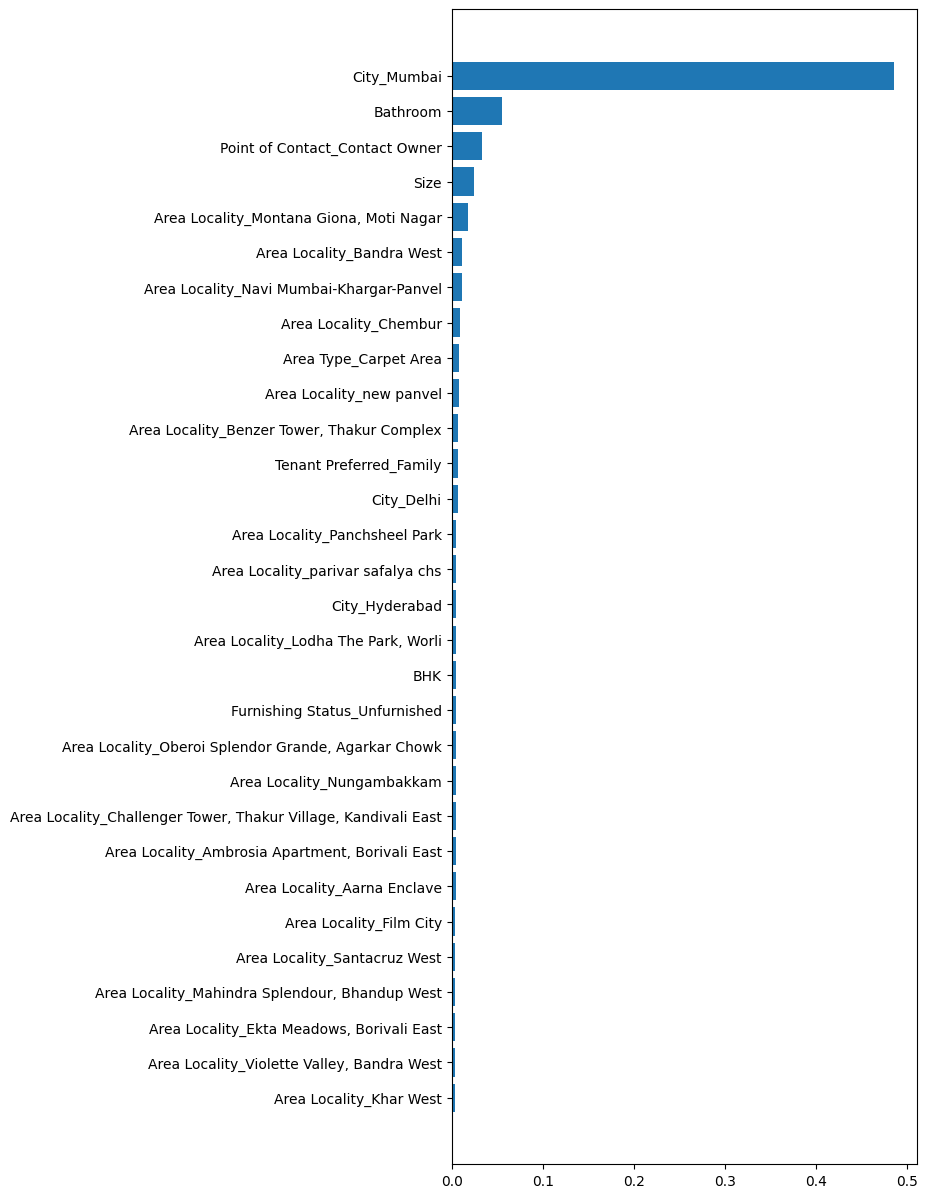

In [1020]:
feature_importance = pd.DataFrame({'Feature': x_train.columns, 'Importance': xgb.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False).head(30)
plt.figure(figsize=(6,15))
plt.barh(feature_importance['Feature'],feature_importance['Importance'])
plt.gca().invert_yaxis()

## <font color='#71B1D9'> Residuals Analysis

<Axes: xlabel='Rent', ylabel='Count'>

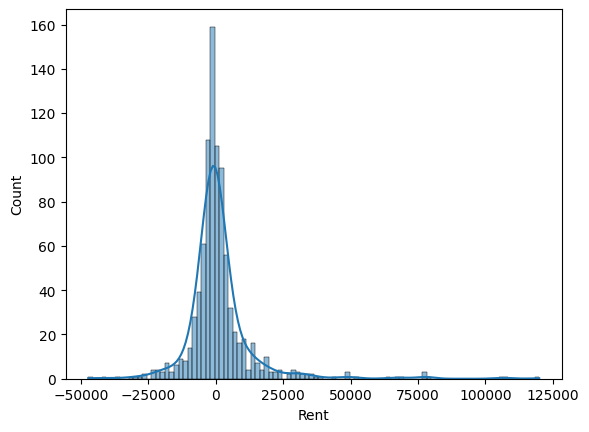

In [1022]:
y_test = y_test.squeeze()
residuals= y_test - predictions
sns.histplot(residuals,bins=100,kde=True)

<Axes: xlabel='Rent', ylabel='Density'>

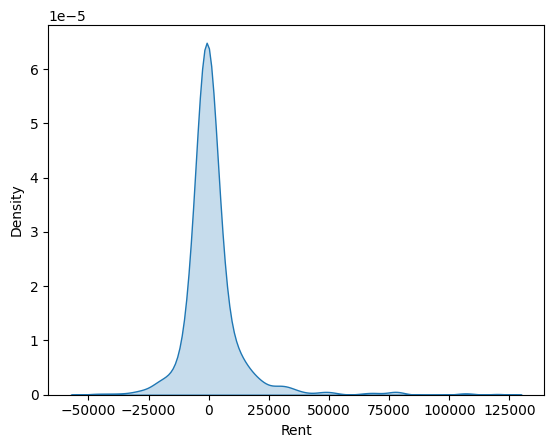

In [1023]:
sns.kdeplot(x=residuals,fill=True)

## <font color='#71B1D9'> Modelling with Deep Learning

In [1261]:
x = df.drop(columns=['Posted On','Rent','Floor'], axis=1)
y = df[['Rent']]
x = pd.get_dummies(x, drop_first=True)

In [1263]:
x['Bathroom']=x['Bathroom']**5

In [1265]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [1266]:
model = Sequential()
model.add(Dense(120, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss='mse', optimizer='adam')

In [1267]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [1270]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=60, verbose=0)

In [1291]:
predictions=model.predict(x_test)
r2_score(y_test,predictions)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


0.6728817820549011

In [1293]:
mean_squared_error(y_test,predictions)**0.5

14922.588654265795

<Axes: >

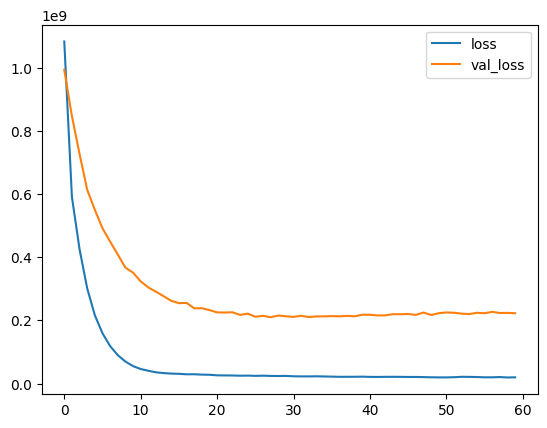

In [1295]:
loss_f=pd.DataFrame(history.history)
loss_f.plot()

## <font color='#71B1D9'> Model Results

### <font color='#71B1D9'> 1. Conversational Modeling Results

From the results, **XGBRegressor** performed the best with an R-squared of 0.745 and the lowest RMSE and MAE, indicating the best fit to the data. The most important features contributing to the model were **city_dumbai** and **bathroom**.

### <font color='#71B1D9'> 2. Deep Learning Model Results

For the deep learning model, the R-squared value achieved was **0.6729** and the RMSE was **14922.59**. These results are slightly lower than the best-performing conversational models but still provide a reasonable level of predictive accuracy.
